<a href="https://colab.research.google.com/github/raniaskhuzai/SVC-R/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
df = pd.read_csv('Walmart_sales.csv')

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df = df[['Weekly_Sales','Temperature']]
df

,Weekly_Sales,Temperature
0,1643690.90,42.31
1,1641957.44,38.51
2,1611968.17,39.93
3,1409727.59,46.63
4,1554806.68,46.50
...,...,...
6430,713173.95,64.88
6431,733455.07,64.89
6432,734464.36,54.47
6433,718125.53,56.47


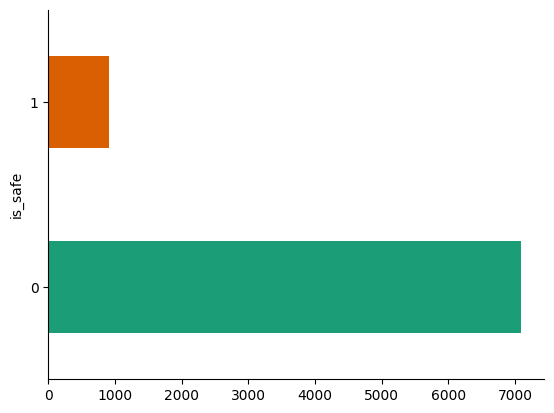

In [ ]:
# @title is_safe

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('is_safe').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Weekly_Sales       Axes(0.125,0.11;0.352273x0.77)
Temperature     Axes(0.547727,0.11;0.352273x0.77)
dtype: object

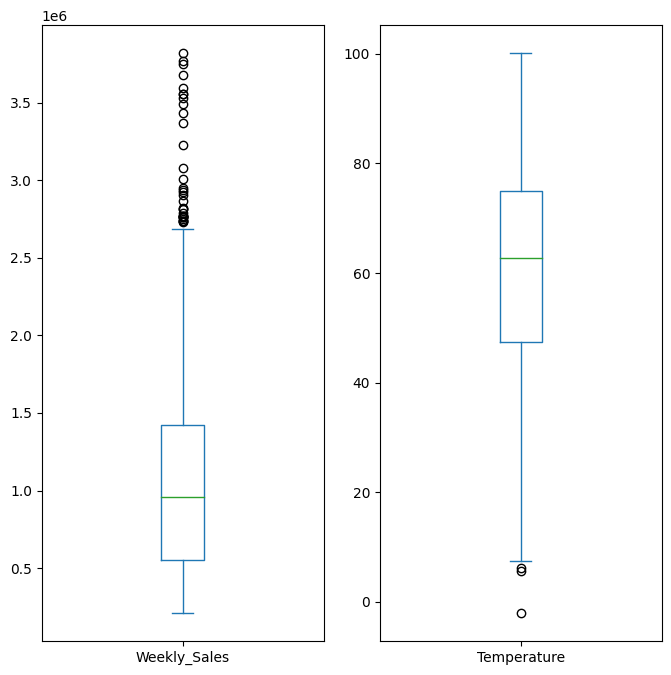

In [ ]:
df.plot(kind='box', subplots=True, figsize=(8,8))

In [ ]:
#SPLITTING DATASET
train, test = train_test_split(df, test_size = 0.2, random_state = 42)

train = train.sort_values('Weekly_Sales')
test = test.sort_values('Weekly_Sales')

x_train, x_test = train[['Weekly_Sales']], test[['Weekly_Sales']]
y_train, y_test = train['Temperature'], test['Temperature']

In [ ]:
#FEATURE SCALLING
scale = StandardScaler().fit(x_train)
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)


In [ ]:
#TRAINING
svr_linear = SVR(kernel='linear', C=100, epsilon=8.5)
svr_poly = SVR(kernel='poly', degree=3, C=100, epsilon=8.5)
svr_linear.fit(x_train, y_train)
svr_poly.fit(x_train, y_train)

SVR(C=100, epsilon=8.5, kernel='poly')

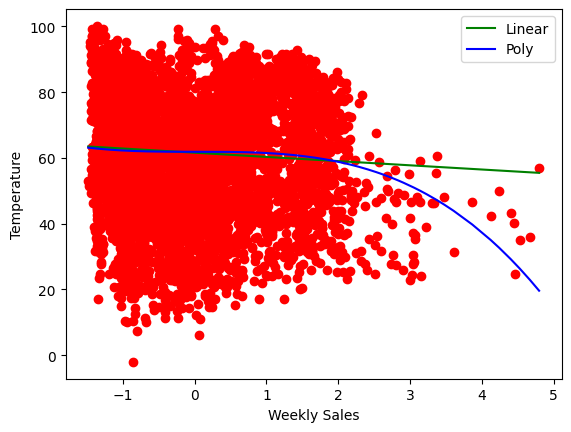

In [ ]:
plt.scatter(x_train, y_train,color='red')
plt.plot(x_train, svr_linear.predict(x_train), color='green', label='Linear')
plt.plot(x_train, svr_poly.predict(x_train), color='blue', label='Poly')
plt.legend()
plt.xlabel('Weekly Sales')
plt.ylabel('Temperature')
plt.show()


In [ ]:
pred_linear = svr_linear.predict(x_test)
pred_poly = svr_poly.predict(x_test)

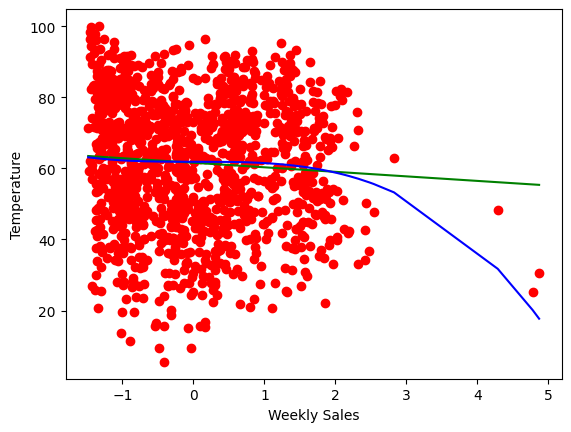

In [ ]:
plt.scatter(x_test, y_test,color='red')
plt.plot(x_test, pred_linear, color='green')
plt.plot(x_test, pred_poly, color='blue')
plt.xlabel('Weekly Sales')
plt.ylabel('Temperature')
plt.show()


In [ ]:
#MAE Linear
round(metrics.mean_absolute_error(y_test, pred_linear),2)

15.32

In [ ]:
#R^2 Linear
round(metrics.r2_score(y_test, pred_linear),2)

0.01

In [ ]:
#MAE POLY

round(metrics.mean_absolute_error(y_test, pred_poly),2)

15.26

In [ ]:
#R^2 POLY
round(metrics.r2_score(y_test, pred_poly),2)

0.01